In [ ]:
### Importação das bibliotecas
import os
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from datetime import date

In [ ]:
#Conectando no google drive para capturar os datasets
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#listar arquivos do diretório atual(/gdrive)
# Acessando a pasta de bases no drive
path = 'gdrive/My Drive/Datasets'

#Listar
!ls

drive  sample_data


In [ ]:
## Leitura das bases para dentro de um dataframe
deputados = pd.read_csv('/content/drive/My Drive/Datasets/deputados.csv', sep=';')
Ano2020 = pd.read_csv('/content/drive/My Drive/Datasets/Ano-2020.csv', sep=';')
eventos2020 = pd.read_csv('/content/drive/My Drive/Datasets/eventos-2020.csv', sep=';')
eventosOrgaos2020 = pd.read_csv('/content/drive/My Drive/Datasets/eventosOrgaos-2020.csv', sep=';')
eventosPresencaDeputados2020 = pd.read_csv('/content/drive/My Drive/Datasets/eventosPresencaDeputados-2020.csv', sep=';')
eventosRequerimentos2020 = pd.read_csv('/content/drive/My Drive/Datasets/eventosRequerimentos-2020.csv', sep=';')
frentes = pd.read_csv('/content/drive/My Drive/Datasets/frentes.csv', sep=';')
frentesDeputados = pd.read_csv('/content/drive/My Drive/Datasets/frentesDeputados.csv', sep=';')
legislaturas = pd.read_csv('/content/drive/My Drive/Datasets/legislaturas.csv', sep=';')
legislaturasMesas = pd.read_csv('/content/drive/My Drive/Datasets/legislaturasMesas.csv', sep=';')
orgaos = pd.read_csv('/content/drive/My Drive/Datasets/orgaos.csv', sep=';')
proposicoes2020 = pd.read_csv('/content/drive/My Drive/Datasets/proposicoes-2020.csv', sep=';')
proposicoesAutores2020 = pd.read_csv('/content/drive/My Drive/Datasets/proposicoesAutores-2020.csv', sep=';')
proposicoesTemas2020 = pd.read_csv('/content/drive/My Drive/Datasets/proposicoesTemas-2020.csv', sep=';')
votacoes2020 = pd.read_csv('/content/drive/My Drive/Datasets/votacoes-2020.csv', sep=';')
votacoesProposicoes2020 = pd.read_csv('/content/drive/My Drive/Datasets/votacoesProposicoes-2020.csv', sep=';')
votocoesVotos2020 = pd.read_csv('/content/drive/My Drive/Datasets/votacoesVotos-2020.csv', sep=';')

In [ ]:
print(deputados)

                                                    uri  ... municipioNascimento
0     https://dadosabertos.camara.leg.br/api/v2/depu...  ...              Recife
1     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
2     https://dadosabertos.camara.leg.br/api/v2/depu...  ...         Santo Amaro
3     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
4     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
...                                                 ...  ...                 ...
7618  https://dadosabertos.camara.leg.br/api/v2/depu...  ...      Rio de Janeiro
7619  https://dadosabertos.camara.leg.br/api/v2/depu...  ...      Ribeirão Preto
7620  https://dadosabertos.camara.leg.br/api/v2/depu...  ...              Maceió
7621  https://dadosabertos.camara.leg.br/api/v2/depu...  ...               Belém
7622  https://dadosabertos.camara.leg.br/api/v2/depu...  ...             Caucaia

[7623 rows x 13 columns]


In [ ]:
#Limpando o Dataset Deputados
# Iremos excluir as colunas uri,urlRedeSocial e urlWebsite
deputados = pd.read_csv('/content/drive/My Drive/Datasets/deputados.csv', sep=';')
#deputados = deputados.drop(columns=['uri']) 
deputados = deputados.drop(columns=['urlRedeSocial'])
deputados = deputados.drop(columns=['urlWebsite'])
deputados = deputados.drop(columns=['cpf'])


In [ ]:
#Verificando valores nulos
deputados.isnull().sum()

uri                        0
nome                       0
idLegislaturaInicial       0
idLegislaturaFinal         0
nomeCivil                  0
cpf                     7623
siglaSexo                  0
urlRedeSocial           7390
urlWebsite              7563
dataNascimento          1416
dataFalecimento         5006
ufNascimento            1536
municipioNascimento     2034
dtype: int64

In [ ]:
#numero total de valores ausentes
deputados.isnull().sum().sum()

32568

In [ ]:
print(deputados)

                                                    uri  ... municipioNascimento
0     https://dadosabertos.camara.leg.br/api/v2/depu...  ...              Recife
1     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
2     https://dadosabertos.camara.leg.br/api/v2/depu...  ...         Santo Amaro
3     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
4     https://dadosabertos.camara.leg.br/api/v2/depu...  ...            Salvador
...                                                 ...  ...                 ...
7618  https://dadosabertos.camara.leg.br/api/v2/depu...  ...      Rio de Janeiro
7619  https://dadosabertos.camara.leg.br/api/v2/depu...  ...      Ribeirão Preto
7620  https://dadosabertos.camara.leg.br/api/v2/depu...  ...              Maceió
7621  https://dadosabertos.camara.leg.br/api/v2/depu...  ...               Belém
7622  https://dadosabertos.camara.leg.br/api/v2/depu...  ...             Caucaia

[7623 rows x 13 columns]


In [ ]:
###Acesso por API 

import requests
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
resp = requests.get(url).json()
for d in resp['dados']:
  print (d['nome'], d['id'])

Abílio Santana 204554
Abou Anni 204521
Acácio Favacho 204379
Adolfo Viana 204560
Adriana Ventura 204528
Adriano do Baldy 121948
Aécio Neves 74646
Afonso Florence 160508
Afonso Hamm 136811
Afonso Motta 178835
Aguinaldo Ribeiro 160527
Airton Faleiro 204495
AJ Albuquerque 204549
Alan Rick 178836
Alceu Moreira 160559
Alcides Rodrigues 204413
Alê Silva 204545
Alencar Santana Braga 204501
Alessandro Molon 160511
Alex Manente 178972
Alex Santana 204571
Alexandre Frota 204544
Alexandre Leite 160545
Alexandre Padilha 204503
Alexandre Serfiotis 178833
Alexis Fonteyne 204516
Alice Portugal 74057
Aliel Machado 178927
Aline Gurgel 204353
Aline Sleutjes 204400
Aluisio Mendes 178881
Amaro Neto 204356
André Abdon 178831
André de Paula 74471
André Ferreira 204423
André Figueiredo 133439
André Fufuca 178882
André Janones 204515
Angela Amin 73696
Antonio Brito 160553
Arlindo Chinaglia 73433
Arnaldo Jardim 141391
Aroldo Martins 204414
Arthur Lira 160541
Arthur Oliveira Maia 160600
Átila Lins 74090
Átila L

In [ ]:
deputados.sort_values(by=['nomeCivil'])

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
7276,https://dadosabertos.camara.leg.br/api/v2/depu...,ABEL MESQUITA JR.,55,55,ABEL SALVADOR MESQUITA JUNIOR,NaN,M,NaN,NaN,1962-03-29,NaN,RR,Boa Vista
3133,https://dadosabertos.camara.leg.br/api/v2/depu...,ABELARDO LUPION,49,54,ABELARDO LUIZ LUPION MELLO,NaN,M,NaN,NaN,1952-08-25,NaN,PR,Curitiba
7083,https://dadosabertos.camara.leg.br/api/v2/depu...,ACELINO POPÓ,54,54,ACELINO FREITAS,NaN,M,"http://www.twitter.com/popofreitas, http://fa...","http://www.popo.com.br, http://www.popo.com.br",1975-09-21,NaN,BA,Salvador
6381,https://dadosabertos.camara.leg.br/api/v2/depu...,ACIVAL GOMES,48,48,ACIVAL GOMES SANTOS,NaN,M,NaN,NaN,1948-01-07,NaN,SE,Estância
7406,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,56,56,ACÁCIO DA SILVA FAVACHO NETO,NaN,M,"acaciofavacho, deputadofederalacaciofavacho, ...",NaN,1983-09-28,NaN,AP,Macapá
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,https://dadosabertos.camara.leg.br/api/v2/depu...,ÍRIS DE ARAÚJO,53,54,ÍRIS DE ARAÚJO REZENDE MACHADO,NaN,F,NaN,NaN,1943-05-07,NaN,MS,Três Lagoas
2905,https://dadosabertos.camara.leg.br/api/v2/depu...,ÍRIS SIMÕES,51,53,ÍRIS XAVIER SIMÕES,NaN,M,NaN,NaN,1961-05-25,NaN,PR,Pato Branco
5981,https://dadosabertos.camara.leg.br/api/v2/depu...,ÍTALO CONTI,44,47,Ítalo Conti,NaN,M,NaN,NaN,1915-09-29,NaN,PR,Mallet
5468,https://dadosabertos.camara.leg.br/api/v2/depu...,ÍTALO FITTIPALDI,42,46,Ítalo Fittipaldi,NaN,M,NaN,NaN,1926-05-18,NaN,RJ,Rio de Janeiro


In [ ]:
deputados.sort_values(by=['uri'])

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
4,https://dadosabertos.camara.leg.br/api/v2/depu...,SILVA LISBOA,1,1,José da Silva Lisboa,NaN,M,NaN,NaN,1756-07-16,1835-08-20,BA,Salvador
44,https://dadosabertos.camara.leg.br/api/v2/depu...,TEIXEIRA DE GOUVEIA,1,2,Lucio Soares Teixeira de Gouvêa,NaN,M,NaN,NaN,1792-05-09,1838-11-21,MG,Mariana
920,https://dadosabertos.camara.leg.br/api/v2/depu...,OLÍMPIO GALVÃO,15,15,Olympio Euzebio Arroxellas Galvão,NaN,M,NaN,NaN,1842-01-28,1882-03-04,AL,Maceió
921,https://dadosabertos.camara.leg.br/api/v2/depu...,BARÃO DE MACEIÓ,15,16,Antonio Teixeira da Rocha,NaN,M,NaN,NaN,NaN,NaN,AL,Maceió
922,https://dadosabertos.camara.leg.br/api/v2/depu...,ARAÚJO GÓIS JÚNIOR,15,20,Innocêncio Marques de Araújo Góis Júnior,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,https://dadosabertos.camara.leg.br/api/v2/depu...,ANTÔNIO PRADO,14,22,Antônio da Silva Prado,NaN,M,NaN,NaN,1840-02-25,1929-04-23,SP,São Paulo
917,https://dadosabertos.camara.leg.br/api/v2/depu...,DUARTE DE AZEVEDO,14,20,Manoel Antonio Duarte de Azevedo,NaN,M,NaN,NaN,1831-01-16,NaN,RJ,Itaboraí
4138,https://dadosabertos.camara.leg.br/api/v2/depu...,ERIVELTON SANTANA,54,55,ERIVELTON LIMA SANTANA,NaN,M,NaN,NaN,1965-01-29,NaN,BA,Salvador
918,https://dadosabertos.camara.leg.br/api/v2/depu...,FLORIANO GODÓI,14,14,Joaquim Floriano de Godóy,NaN,M,NaN,NaN,1826-01-04,NaN,SP,São Paulo


In [ ]:
deputados.head()

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
0,https://dadosabertos.camara.leg.br/api/v2/depu...,LOPES GAMA,1,2,Caetano Maria Lopes Gama,NaN,M,NaN,NaN,1795-08-05,1864-06-21,PE,Recife
1,https://dadosabertos.camara.leg.br/api/v2/depu...,CARNEIRO,1,1,Francisco Carneiro de Campos,NaN,M,NaN,NaN,1776-01-01,1842-12-08,BA,Salvador
2,https://dadosabertos.camara.leg.br/api/v2/depu...,CALMON,1,4,Miguel Calmon Du Pin e Almeida,NaN,M,NaN,NaN,1796-12-22,1865-10-05,BA,Santo Amaro
3,https://dadosabertos.camara.leg.br/api/v2/depu...,MONTEZUMA,2,8,Francisco Gê Acayaba Montezuma,NaN,M,NaN,NaN,1794-03-23,1870-02-15,BA,Salvador
4,https://dadosabertos.camara.leg.br/api/v2/depu...,SILVA LISBOA,1,1,José da Silva Lisboa,NaN,M,NaN,NaN,1756-07-16,1835-08-20,BA,Salvador


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Ano-2020.csv', sep=';',encoding= 'utf-8')

In [ ]:
# Valor total das despesas dos parlamentares
df['vlrLiquido'].sum()

58523767.519999996

In [ ]:
#Quantos valores de restitução de cada parlamentar que foram pedidos restituição
df['txNomeParlamentar'].value_counts()

Nereu Crispim               534
Delegado Antônio Furtado    476
Policial Katia Sastre       455
Aline Sleutjes              443
Diego Garcia                419
                           ... 
Felipe Carreras               3
Dr. João                      3
PP                            2
Tadeu Filippelli              2
Capitão Fábio Abreu           2
Name: txNomeParlamentar, Length: 536, dtype: int64

In [ ]:
#Quanto cada Parlamentar solicitou de restituição?
df.groupby('txNomeParlamentar')['vlrRestituicao'].sum().sort_values(ascending=False)

txNomeParlamentar
Caroline de Toni       1863.75
Dr. Frederico          1000.00
Túlio Gadêlha           500.00
Alexandre Frota         438.97
Paulo Guedes            100.00
                        ...   
Maurício Dziedricki       0.00
Miguel Haddad             0.00
Miguel Lombardi           0.00
Milton Vieira             0.00
AJ Albuquerque            0.00
Name: vlrRestituicao, Length: 536, dtype: float64

In [ ]:
# 10 maiores valores para cada Parlmaentar de despesas
### Ajustar para as despesas de cada parlamentar ou liderança de partidos com cada tipo de descrição
df.nlargest(10,'vlrLiquido')

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
5030,Gonzaga Patriota,1.960970e+09,74419.0,143.0,2019,PE,PSB,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,SHEKINAH COMUNICACAO E MARKETING LTDA - ME,025.801.600/0018-2,82,4,2020-05-18T00:00:00,57500.0,0.0,57500.0,5,2020,0,NaN,NaN,1696441,NaN,NaN,137,7054575,http://camara.leg.br/cota-parlamentar/nota-fis...
28004,Alex Manente,2.683819e+10,178972.0,331.0,2019,SP,CIDADANIA,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ADAPRINT ARTES GRAFICAS LTDA,034.062.710/0013-0,2348,0,2020-03-13T00:00:00,53280.0,0.0,53280.0,3,2020,0,NaN,NaN,1687004,NaN,NaN,3011,7037963,https://www.camara.leg.br/cota-parlamentar/doc...
4657,Giacobo,7.182740e+10,74383.0,466.0,2019,PR,PL,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,GALZON EDITORA GRAFICA LTDA,074.362.650/0018-6,6617,0,2020-03-02T00:00:00,53000.0,0.0,53000.0,3,2020,0,NaN,NaN,1680884,NaN,NaN,1651,7023127,https://www.camara.leg.br/cota-parlamentar/doc...
1935,Hermes Parcianello,3.349632e+10,73772.0,448.0,2019,PR,MDB,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ARTGRAFICA PREMIO LTDA - ME,089.365.840/0011-3,1175,4,2020-04-23T00:00:00,47250.0,0.0,47250.0,4,2020,0,NaN,NaN,1700736,NaN,NaN,1042,7062265,http://camara.leg.br/cota-parlamentar/nota-fis...
34472,Valdevan Noventa,5.175284e+10,204385.0,183.0,2019,SE,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,AGUIAR E MOURA ADVOCADOS ASSOCIADOS,291.918.250/0011-2,202000000000003,0,2020-06-10T00:00:00,45000.0,0.0,45000.0,5,2020,0,NaN,NaN,1701037,NaN,NaN,3389,7062909,https://www.camara.leg.br/cota-parlamentar/doc...
48073,Vavá Martins,1.986310e+07,204505.0,35.0,2019,PA,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,MULTIGRAFICA SERVIÇOS GRAFICOS LTDA,141.540.170/0010-8,00003587,0,2020-05-27T00:00:00,45000.0,0.0,45000.0,5,2020,0,NaN,NaN,1698168,NaN,NaN,3323,7057847,https://www.camara.leg.br/cota-parlamentar/doc...
41155,Helio Lopes,8.917437e+08,204444.0,303.0,2019,RJ,PSL,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,GENESIS PUBLICIDADE LTDA,306.897.220/0016-6,00000081,0,2019-12-27T00:00:00,44000.0,0.0,44000.0,1,2020,0,NaN,NaN,1683699,NaN,NaN,3344,6992419,https://www.camara.leg.br/cota-parlamentar/doc...
19019,Professora Marcivania,3.277055e+10,160641.0,15.0,2019,AP,PCdoB,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,ECOS SERVICOS LTDA - ME,057.060.420/0016-6,202000000000002,0,2020-01-30T00:00:00,41860.0,0.0,41860.0,1,2020,0,NaN,NaN,1670714,NaN,NaN,2339,7002487,https://www.camara.leg.br/cota-parlamentar/doc...
24538,Ricardo Teobaldo,4.732998e+10,178920.0,157.0,2019,PE,PODE,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,UNIPAUTA FORMULARIOS LTDA,355.937.060/0019-9,5951,0,2020-02-17T00:00:00,40950.0,0.0,40950.0,2,2020,0,NaN,NaN,1677528,NaN,NaN,3012,7016543,https://www.camara.leg.br/cota-parlamentar/doc...
10028,Vicentinho Júnior,9.989866e+10,137070.0,66.0,2019,TO,PL,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DMD Gestão Administrativa LTDA - ME,026.102.350/0012-0,337,4,2020-01-23T00:00:00,40000.0,0.0,40000.0,1,2020,0,NaN,NaN,1668289,NaN,NaN,3059,6997536,http://camara.leg.br/cota-parlamentar/nota-fis...


In [ ]:
# 10 menores valores de despesa
#
df.nsmallest(10, 'vlrLiquido').T

,39933,16000,41189,4146,10998,40447,40448,10997,37282,9494
txNomeParlamentar,Margarete Coelho,Alexandre Leite,Helio Lopes,Júlio Cesar,Edio Lopes,Jesus Sérgio,Jesus Sérgio,Edio Lopes,Fernanda Melchionna,Enio Verri
cpf,1.83412e+10,2.29708e+10,8.91744e+08,1.10213e+09,7.7549e+10,5.80651e+10,5.80651e+10,7.7549e+10,2.13461e+08,3.97377e+10
ideCadastro,204430,160545,204444,74317,141417,204435,204435,141417,204407,132504
nuCarteiraParlamentar,117,334,303,114,2,52,52,2,496,449
nuLegislatura,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
sgUF,PI,SP,RJ,PI,RR,AC,AC,RR,RS,PR
sgPartido,PP,DEM,PSL,PSD,PL,PDT,PDT,PL,PSOL,PT
codLegislatura,56,56,56,56,56,56,56,56,56,56
numSubCota,999,999,999,999,999,999,999,999,999,999
txtDescricao,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - RPA


In [ ]:
#Quantidade de despesas pelo seu tipo de despesa

df['txtDescricao'].value_counts()

COMBUSTÍVEIS E LUBRIFICANTES.                                16574
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR     9123
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                     6829
TELEFONIA                                                     5782
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                          4828
SERVIÇOS POSTAIS                                              3907
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                    2494
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 2432
PASSAGEM AÉREA - RPA                                          1980
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        1115
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                  901
PASSAGEM AÉREA - REEMBOLSO                                     475
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       273
ASSINATURA DE PUBLICAÇÕES                                      253
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                   

In [ ]:
#Valores totais das despesas por descrição
df.groupby('txtDescricao')['vlrLiquido'].sum().sort_values(ascending=False)

txtDescricao
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         19218155.61
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                10512280.28
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    10328624.11
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                 8067485.57
COMBUSTÍVEIS E LUBRIFICANTES.                                 4534651.91
TELEFONIA                                                     1515749.43
PASSAGEM AÉREA - RPA                                          1474151.40
SERVIÇOS POSTAIS                                               528488.70
PASSAGEM AÉREA - REEMBOLSO                                     515487.30
LOCAÇÃO OU FRETAMENTO DE AERONAVES                             469242.00
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       428788.17
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.         315498.83
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                      216982.78
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAME

In [ ]:
# Por aqui iremos acessar via API os dados da camara, esses dados são atualizados diariamente.
### Analisar dados dos partidos
url = 'https://dadosabertos.camara.leg.br/api/v2/partidos?itens=100&ordem=ASC&ordenarPor=sigla'

resposta = requests.get(url)

resposta.text

'{"dados":[{"id":36898,"sigla":"AVANTE","nome":"Avante","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36898"},{"id":37905,"sigla":"CIDADANIA","nome":"Cidadania","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37905"},{"id":37902,"sigla":"DC","nome":"Democracia Cristã","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37902"},{"id":36769,"sigla":"DEM","nome":"Democratas","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36769"},{"id":36899,"sigla":"MDB","nome":"Movimento Democrático Brasileiro","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/36899"},{"id":37901,"sigla":"NOVO","nome":"Partido Novo","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37901"},{"id":37900,"sigla":"PATRI","nome":"Patriota","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37900"},{"id":37907,"sigla":"PATRIOTA","nome":"Patriota","uri":"https://dadosabertos.camara.leg.br/api/v2/partidos/37907"},{"id":36863,"sigla":"PCB","nome":"Partido Constituciona

In [ ]:
#Passar as informações para dataframe
df2 = pd.DataFrame(resposta.json()['dados'])
df2.head()

,id,sigla,nome,uri
0,36898,AVANTE,Avante,https://dadosabertos.camara.leg.br/api/v2/part...
1,37905,CIDADANIA,Cidadania,https://dadosabertos.camara.leg.br/api/v2/part...
2,37902,DC,Democracia Cristã,https://dadosabertos.camara.leg.br/api/v2/part...
3,36769,DEM,Democratas,https://dadosabertos.camara.leg.br/api/v2/part...
4,36899,MDB,Movimento Democrático Brasileiro,https://dadosabertos.camara.leg.br/api/v2/part...


In [ ]:
#Quantidade de partidos
df2['sigla'].count()

40

In [ ]:
#Nome dos partidos
df2['nome']

0                                             Avante
1                                          Cidadania
2                                  Democracia Cristã
3                                         Democratas
4                   Movimento Democrático Brasileiro
5                                       Partido Novo
6                                           Patriota
7                                           Patriota
8              Partido Constitucionalista Brasileiro
9                        Partido Comunista do Brasil
10                         Partido da Causa Operária
11                   Partido Democrático Trabalhista
12                Partido Humanista da Solidariedade
13                                   Partido Liberal
14                      Partido da Mulher Brasileira
15                   Partido da Mobilização Nacional
16                                           Podemos
17                                     Progressistas
18                              Partido Pátria

In [ ]:
#Informações do dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40 non-null     int64 
 1   sigla   40 non-null     object
 2   nome    40 non-null     object
 3   uri     40 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [ ]:
##### Deputados Acesso via API
url2 = 'https://dadosabertos.camara.leg.br/api/v2/deputados?itens=100'
resposta2 = requests.get(url2)

df3 = pd.DataFrame(resposta2.json()['dados'])

In [ ]:
#verificando o dataframe
df3.head(3)

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br


In [ ]:
# Quantidade de registros por dataframe
df3.count()

id               100
uri              100
nome             100
siglaPartido     100
uriPartido       100
siglaUf          100
idLegislatura    100
urlFoto          100
email            100
dtype: int64

In [ ]:
# Como obter os links para as próximas páginas
resposta2.json()['links'][1]['href']

'https://dadosabertos.camara.leg.br/api/v2/partidos?ordem=ASC&ordenarPor=sigla&pagina=1&itens=100'

In [ ]:
# Separar os links da resposta
for item in resposta2.json()['links']:    
    if item['rel'] == 'self':
        atual = item['href']
    elif item['rel'] == 'last':
        ultimo = item['href']
    elif item['rel'] == 'next':
        proximo = item['href']

# Enquanto a pagina atual for diferente da ultima pagina
while atual != ultimo:
    # Requisita os dados
    resposta2 = requests.get(proximo)
    # Adiciona no df
    df3 = df3.append(pd.DataFrame(resposta2.json()['dados']))
    
    # Separar os links da resposta
    for item in resposta2.json()['links']:
        if item['rel'] == 'self':
            atual = item['href']
        elif item['rel'] == 'last':
            ultimo = item['href']
        elif item['rel'] == 'next':
            proximo = item['href']
        
df3.count()

id               513
uri              513
nome             513
siglaPartido     513
uriPartido       513
siglaUf          513
idLegislatura    513
urlFoto          513
email            513
dtype: int64

In [ ]:
#Quantidade de partidos por estado
df3.groupby('siglaUf').siglaPartido.value_counts()

siglaUf  siglaPartido 
AC       MDB              2
         DEM              1
         PCdoB            1
         PDT              1
         PSDB             1
                         ..
TO       SOLIDARIEDADE    2
         MDB              1
         PL               1
         PSC              1
         PT               1
Name: siglaPartido, Length: 293, dtype: int64

In [ ]:
# Filtro por Partido DEM
# Deputados do  partido DEM por quantidade por Estado
df3.query('siglaPartido == "DEM"').siglaUf.value_counts()

BA    5
SP    5
RJ    4
PA    2
GO    2
TO    2
ES    1
DF    1
MA    1
PR    1
PB    1
MG    1
PE    1
AC    1
Name: siglaUf, dtype: int64

In [ ]:
# Filtrar os deputados por nome do partido DEM que são de São Paulo
df3.query('siglaPartido == "DEM" and siglaUf == "SP"').nome

22     Alexandre Leite
22        David Soares
60    Eli Corrêa Filho
4      Geninho Zuliani
90       Kim Kataguiri
Name: nome, dtype: object

In [ ]:
X = df3['siglaPartido']
Y = df3["siglaUf"]

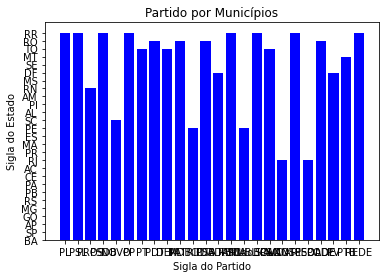

In [ ]:
plt.bar(X,Y, color='blue')
plt.xlabel('Sigla do Partido')
plt.ylabel('Sigla do Estado')
plt.title('Partido por Municípios')
plt.show()

In [ ]:
### Para salvar.... podemos analisar e bater com os dados disponibilizados

##https://www.camara.leg.br/deputados/204451?ano=2019